**Explanation**

In this notebook, I will use a CNN Model to create a Fashion Embedding. This information can be used in ML algorithms with higher semantic quality and similarity between Objects. We will use embeddings to identify similar items, this information will be used to recommend similar content in RecSys.

## Data Preparation
Import`matplotlib` and other modules.

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure
import cv2
import seaborn as sns


In [12]:
DATASET_PATH = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/"
print(os.listdir(DATASET_PATH))

['images.csv', 'images', 'styles.csv', 'styles', 'fashion-dataset']


In [13]:
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=5000, error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
df.head(10)

/tmp/ipykernel_32/3603623418.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=5000, error_bad_lines=False)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016,Casual,Skagen Men Black Watch,30039.jpg


In [14]:
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img):
    return DATASET_PATH+"/images/"+img

def load_image(img, resized_fac = 0.1):
    img     = cv2.imread(img_path(img))
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

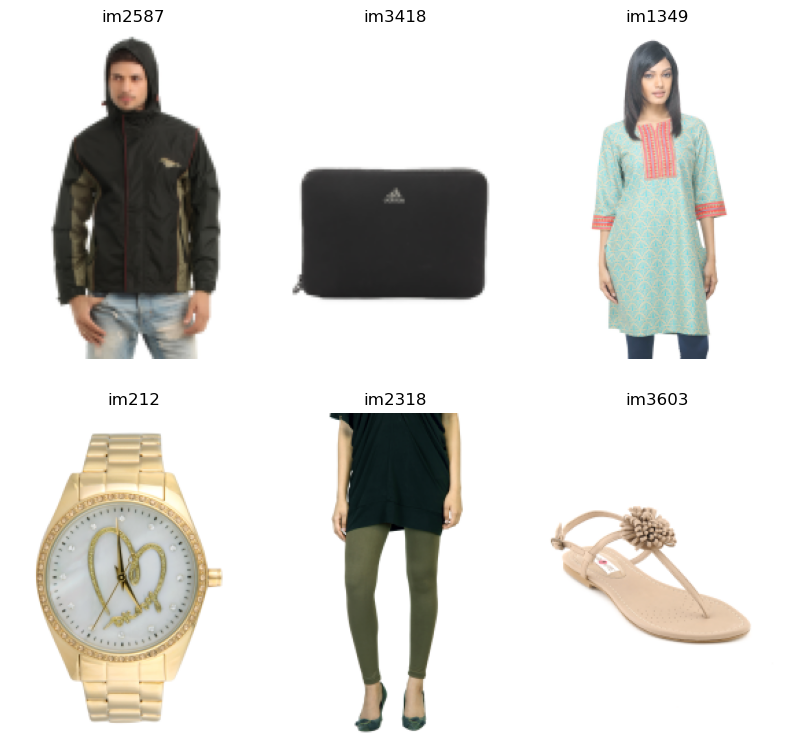

In [15]:
# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(6).iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

The Dataset is made up of different items that can be found in a marketplace. The idea is to use embeddings to search for similarity and find similar items just using the image.

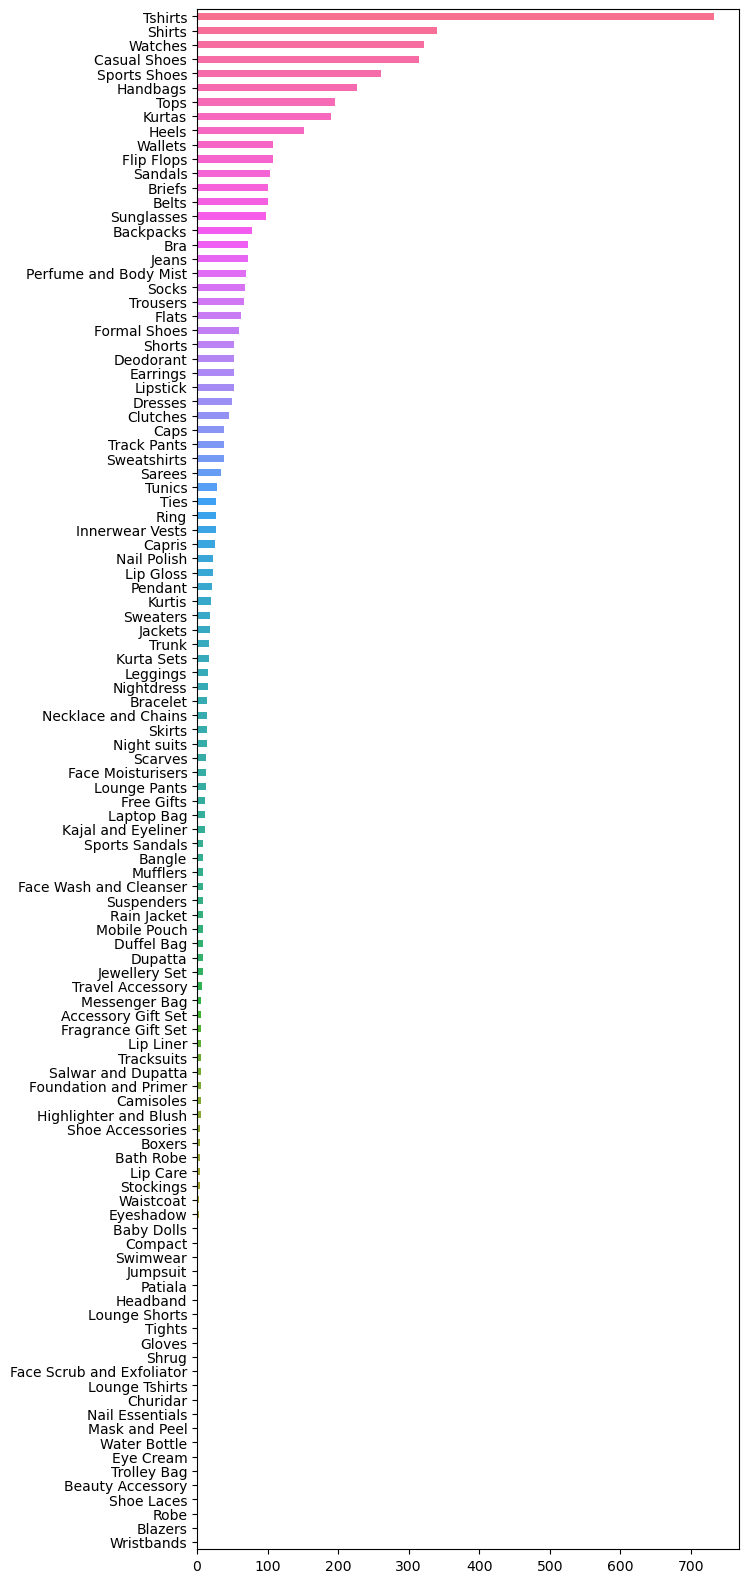

In [16]:
plt.figure(figsize=(7, 20))
# Generate a color palette with the desired number of colors
colors = sns.color_palette('husl', len(df.articleType.unique()))

# Plot the bar chart with the specified colors
df.articleType.value_counts().sort_values().plot(kind='barh', color=colors)

plt.show()


In [17]:
from tabulate import tabulate

# Assuming your dataset is stored in the 'df' DataFrame
item_counts = df['articleType'].value_counts().reset_index()
item_counts.columns = ['Item', 'Count']
item_counts = item_counts.sort_values(by='Count', ascending=False)

# Calculate the total number of items
total_items = item_counts['Count'].sum()

# Append the total count as a new row to the DataFrame
total_row = pd.DataFrame({'Item': ['Total'], 'Count': [total_items]})
item_counts = pd.concat([item_counts, total_row])

# Convert the DataFrame to a formatted table
table = tabulate(item_counts, headers='keys', tablefmt='fancy_grid')

# Print the table
print(table)



╒═════╤═══════════════════════════╤═════════╕
│     │ Item                      │   Count │
╞═════╪═══════════════════════════╪═════════╡
│   0 │ Tshirts                   │     732 │
├─────┼───────────────────────────┼─────────┤
│   1 │ Shirts                    │     340 │
├─────┼───────────────────────────┼─────────┤
│   2 │ Watches                   │     322 │
├─────┼───────────────────────────┼─────────┤
│   3 │ Casual Shoes              │     315 │
├─────┼───────────────────────────┼─────────┤
│   4 │ Sports Shoes              │     261 │
├─────┼───────────────────────────┼─────────┤
│   5 │ Handbags                  │     227 │
├─────┼───────────────────────────┼─────────┤
│   6 │ Tops                      │     196 │
├─────┼───────────────────────────┼─────────┤
│   7 │ Kurtas                    │     190 │
├─────┼───────────────────────────┼─────────┤
│   8 │ Heels                     │     151 │
├─────┼───────────────────────────┼─────────┤
│   9 │ Wallets                   

## Use Pre-Trained Model to Recommendation

In [18]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalMaxPooling2D

print(tf.__version__)


2.12.0


In [19]:
# Input Shape
img_width, img_height, _ = 224, 224, 3 #load_image(df.iloc[0].image).shape

# Pre-Trained Model
from tensorflow.keras.models import Sequential
base_model = ResNet50(weights='/kaggle/input/resnet50-weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_1 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [20]:
def get_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

Get item Embedding

In [21]:
emb = get_embedding(model, df.iloc[0].image)
emb.shape

1/1 [==============================] - 1s 1s/step


(2048,)

(240, 180, 3)
[ 5.939164   2.3722565  0.        ...  1.3595561  0.        10.893185 ]


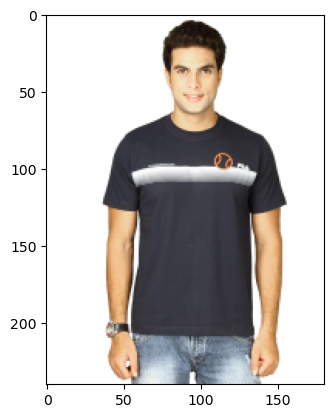

In [22]:
img_array = load_image(df.iloc[27].image)
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
print(img_array.shape)
print(emb)

In [23]:
df.shape

(5000, 11)

Get Embedding for all itens in dataset

In [24]:
%%time
#import swifter

# Parallel apply
df_sample      = df#.sample(10)
map_embeddings = df_sample['image'].apply(lambda img: get_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

1/1 [==============================] - 0s 126ms/step
(5000, 2048)
CPU times: user 30min 46s, sys: 52.8 s, total: 31min 38s
Wall time: 18min 44s


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,5.939164,2.372257,0.000000,3.246122,0.957503,2.766367,8.802009,6.304139,0.805902,1.697347,...,2.396971,0.000000,1.801747,20.561764,3.954443,0.000000,8.289471,1.359556,0.000000,10.893185
1,5.790412,9.593652,0.000000,9.431687,0.287238,0.259950,17.028755,3.037456,0.136339,0.000000,...,1.670569,0.013894,10.338678,4.784732,0.189142,0.000000,7.739138,0.372693,0.000000,8.903797
2,0.000000,3.162264,0.484694,0.172313,2.609545,3.840852,3.426132,0.253247,1.098901,1.418278,...,0.434923,14.092848,3.018758,2.134510,2.549057,0.377387,6.180353,0.636621,14.018168,11.415053
3,5.882204,1.958622,0.000000,12.519884,0.000000,0.000000,9.383584,3.781623,0.000000,1.490620,...,17.825481,0.000000,3.592511,2.042306,0.000000,0.000000,6.656784,1.457313,1.694215,1.403331
4,0.245960,17.383436,0.493822,3.374463,2.567366,0.000000,6.482548,5.862635,0.000000,3.164864,...,4.464021,0.447082,1.448132,12.884141,0.000000,0.397488,5.028076,1.939697,0.000000,11.485396


#### Compute Similarity Between Items, Cosine Similarity

In [25]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html
from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine_sim = 1-pairwise_distances(df_embs, metric='cosine')
cosine_sim[:4, :4]

array([[0.99999887, 0.7128041 , 0.4537503 , 0.67937213],
       [0.7128041 , 0.99999964, 0.4151531 , 0.8333089 ],
       [0.4537503 , 0.4151531 , 0.99999887, 0.44629467],
       [0.67937213, 0.8333089 , 0.44629467, 0.99999917]], dtype=float32)

#### Recommender Similar Items

In [26]:
indices = pd.Series(range(len(df)), index=df.index)
indices

# Function that get movie recommendations based on the cosine similarity score of movie genres
def get_recommender(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

get_recommender(2993, df, top_n = 5)

(Int64Index([251, 659, 2400, 0, 1821], dtype='int64'),
 [0.9244307, 0.9223507, 0.918767, 0.91462517, 0.91380036])

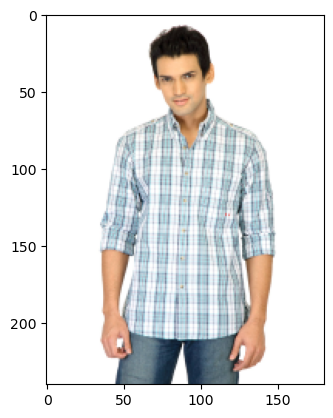

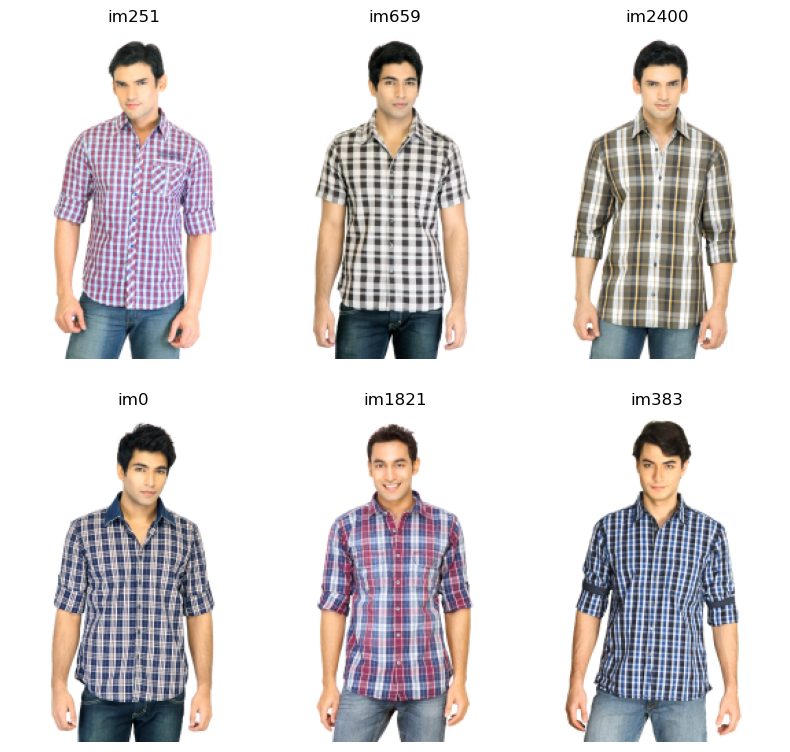

In [27]:
# Idx Item to Recommender
idx_ref = 2993

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

**Search for items similar to the reference to recommend. Apparently it's working!**

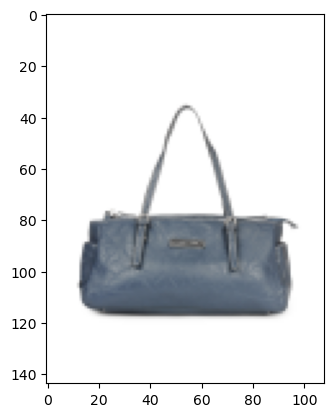

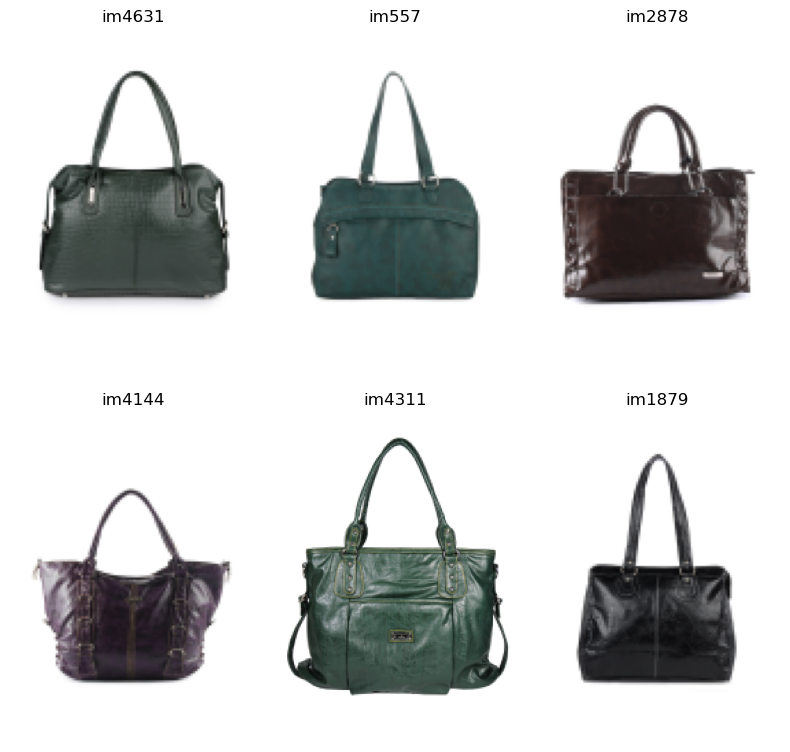

In [28]:
idx_ref = 875

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

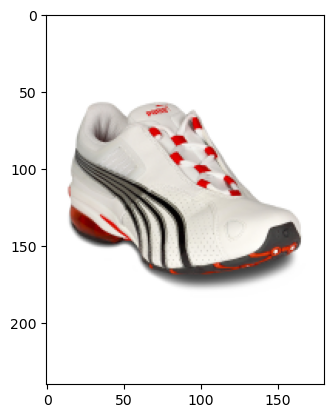

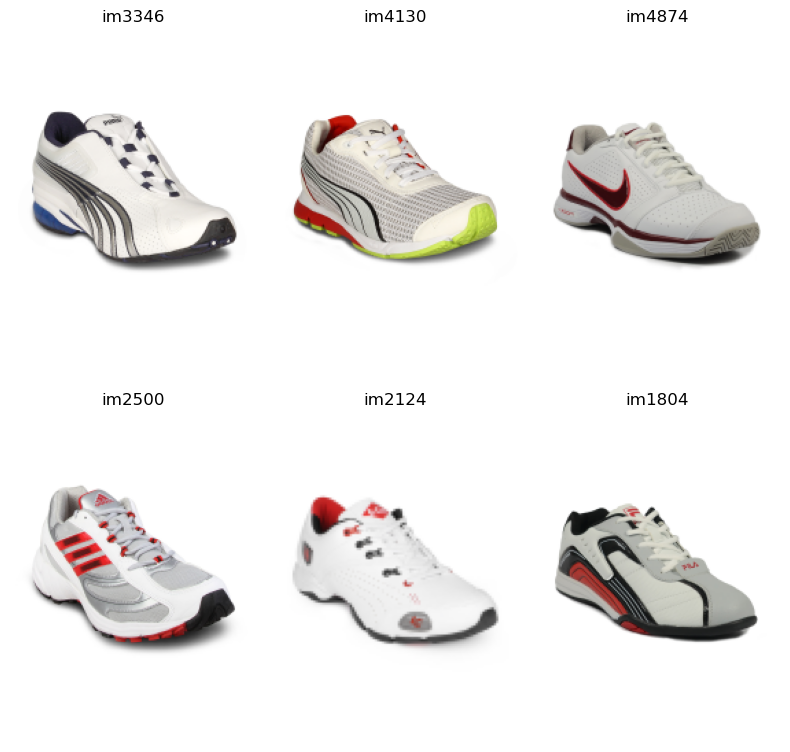

In [29]:
idx_ref = 987

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)

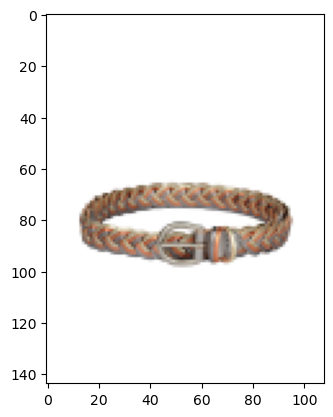

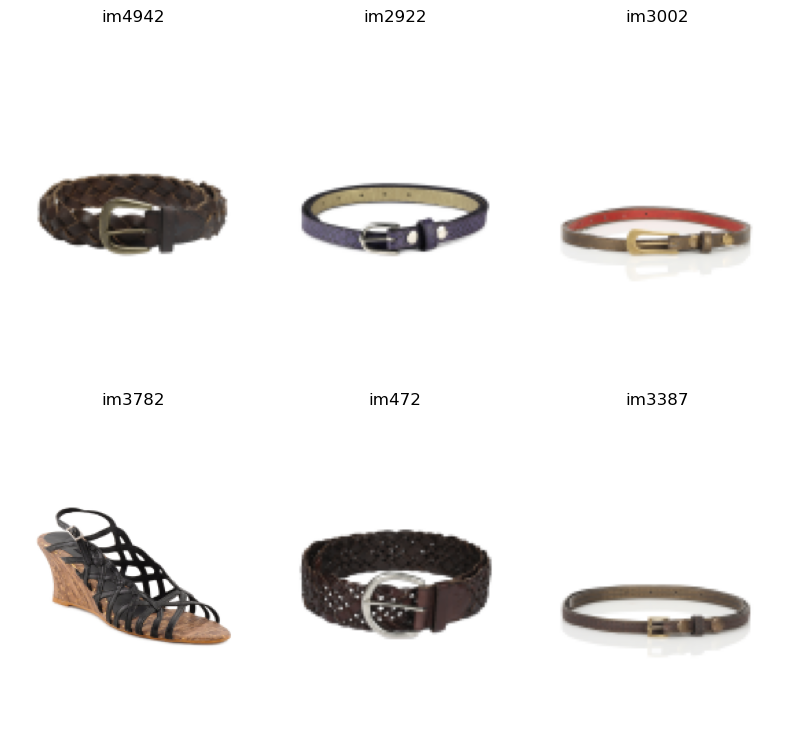

In [30]:
idx_ref = 3524

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)